<a href="https://colab.research.google.com/github/Arvind0-0/ML-Projects/blob/main/Project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Project 2 Car Price Prediction


In [1]:
import pandas as pd


In [2]:
df = pd.read_csv("https://www.dropbox.com/s/aa37fjiyy63l2h7/UsedCarPrice.csv?dl=1")


In [3]:
df.head()


,Brand,Model,Year,Selling_Price,KM_Driven,Fuel,Seller_Type,Transmission,Owner
0,Maruti,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [4]:
df.shape


(4340, 9)

In [5]:
print(df['Seller_Type'].unique())
print(df['Transmission'].unique())
print(df['Owner'].unique())

['Individual' 'Dealer' 'Trustmark Dealer']
['Manual' 'Automatic']
['First Owner' 'Second Owner' 'Fourth & Above Owner' 'Third Owner'
 'Test Drive Car']


In [6]:
df.isnull().sum()


Brand            0
Model            0
Year             0
Selling_Price    0
KM_Driven        0
Fuel             0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [7]:
df.columns


Index(['Brand', 'Model', 'Year', 'Selling_Price', 'KM_Driven', 'Fuel',
       'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [12]:
final_dataset = df[['Year', 'Selling_Price', 'KM_Driven',
       'Fuel', 'Seller_Type', 'Transmission', 'Owner']]


In [13]:
final_dataset.head()


,Year,Selling_Price,KM_Driven,Fuel,Seller_Type,Transmission,Owner
0,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [17]:
final_dataset['Current_Year'] = 2022


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [15]:
final_dataset.head()


,Year,Selling_Price,KM_Driven,Fuel,Seller_Type,Transmission,Owner,Current_Year
0,2007,60000,70000,Petrol,Individual,Manual,First Owner,2021
1,2007,135000,50000,Petrol,Individual,Manual,First Owner,2021
2,2012,600000,100000,Diesel,Individual,Manual,First Owner,2021
3,2017,250000,46000,Petrol,Individual,Manual,First Owner,2021
4,2014,450000,141000,Diesel,Individual,Manual,Second Owner,2021


In [18]:
final_dataset['Age'] = final_dataset['Current_Year']-final_dataset['Year']


In [20]:
final_dataset.head()


,Year,Selling_Price,KM_Driven,Fuel,Seller_Type,Transmission,Owner,Current_Year,Age
0,2007,60000,70000,Petrol,Individual,Manual,First Owner,2022,15
1,2007,135000,50000,Petrol,Individual,Manual,First Owner,2022,15
2,2012,600000,100000,Diesel,Individual,Manual,First Owner,2022,10
3,2017,250000,46000,Petrol,Individual,Manual,First Owner,2022,5
4,2014,450000,141000,Diesel,Individual,Manual,Second Owner,2022,8


In [21]:
final_dataset.drop(['Year'],axis=1,inplace=True)


In [23]:
final_dataset.drop(['Current_Year'],axis=1,inplace=True)


In [24]:
final_dataset.head()


,Selling_Price,KM_Driven,Fuel,Seller_Type,Transmission,Owner,Age
0,60000,70000,Petrol,Individual,Manual,First Owner,15
1,135000,50000,Petrol,Individual,Manual,First Owner,15
2,600000,100000,Diesel,Individual,Manual,First Owner,10
3,250000,46000,Petrol,Individual,Manual,First Owner,5
4,450000,141000,Diesel,Individual,Manual,Second Owner,8


In [26]:
print(df['Fuel'].unique())


['Petrol' 'Diesel' 'CNG' 'LPG' 'Electric']


In [27]:
final_dataset=pd.get_dummies(final_dataset,drop_first=True)


In [28]:
final_dataset.head()


,Selling_Price,KM_Driven,Age,Fuel_Diesel,Fuel_Electric,Fuel_LPG,Fuel_Petrol,Seller_Type_Individual,Seller_Type_Trustmark Dealer,Transmission_Manual,Owner_Fourth & Above Owner,Owner_Second Owner,Owner_Test Drive Car,Owner_Third Owner
0,60000,70000,15,0,0,0,1,1,0,1,0,0,0,0
1,135000,50000,15,0,0,0,1,1,0,1,0,0,0,0
2,600000,100000,10,1,0,0,0,1,0,1,0,0,0,0
3,250000,46000,5,0,0,0,1,1,0,1,0,0,0,0
4,450000,141000,8,1,0,0,0,1,0,1,0,1,0,0


In [29]:
final_dataset


,Selling_Price,KM_Driven,Age,Fuel_Diesel,Fuel_Electric,Fuel_LPG,Fuel_Petrol,Seller_Type_Individual,Seller_Type_Trustmark Dealer,Transmission_Manual,Owner_Fourth & Above Owner,Owner_Second Owner,Owner_Test Drive Car,Owner_Third Owner
0,60000,70000,15,0,0,0,1,1,0,1,0,0,0,0
1,135000,50000,15,0,0,0,1,1,0,1,0,0,0,0
2,600000,100000,10,1,0,0,0,1,0,1,0,0,0,0
3,250000,46000,5,0,0,0,1,1,0,1,0,0,0,0
4,450000,141000,8,1,0,0,0,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4335,409999,80000,8,1,0,0,0,1,0,1,0,1,0,0
4336,409999,80000,8,1,0,0,0,1,0,1,0,1,0,0
4337,110000,83000,13,0,0,0,1,1,0,1,0,1,0,0
4338,865000,90000,6,1,0,0,0,1,0,1,0,0,0,0


In [30]:
final_dataset.corr(method ='pearson')


,Selling_Price,KM_Driven,Age,Fuel_Diesel,Fuel_Electric,Fuel_LPG,Fuel_Petrol,Seller_Type_Individual,Seller_Type_Trustmark Dealer,Transmission_Manual,Owner_Fourth & Above Owner,Owner_Second Owner,Owner_Test Drive Car,Owner_Third Owner
Selling_Price,1.000000,-0.192289,-0.413922,0.282947,-0.005095,-0.042434,-0.269453,-0.236798,0.110176,-0.530205,-0.078725,-0.161986,0.048799,-0.111326
KM_Driven,-0.192289,1.000000,0.419688,0.285396,-0.001372,0.036652,-0.291139,0.182663,-0.089858,0.120226,0.097349,0.195203,-0.083445,0.194713
Age,-0.413922,0.419688,1.000000,-0.121424,0.025540,0.051266,0.114908,0.173703,-0.100225,0.143800,0.186361,0.292349,-0.095795,0.244308
Fuel_Diesel,0.282947,0.285396,-0.121424,1.000000,-0.015063,-0.072422,-0.970934,-0.035314,-0.007911,-0.048098,-0.021054,0.003524,-0.010575,0.009373
Fuel_Electric,-0.005095,-0.001372,0.025540,-0.015063,1.000000,-0.001108,-0.014856,-0.026118,-0.002355,-0.044746,-0.002094,0.025960,-0.000952,-0.004166
Fuel_LPG,-0.042434,0.036652,0.051266,-0.072422,-0.001108,1.000000,-0.071427,0.035122,-0.011324,0.024764,0.013384,0.030141,-0.004577,0.004836
Fuel_Petrol,-0.269453,-0.291139,0.114908,-0.970934,-0.014856,-0.071427,1.000000,0.029845,0.012489,0.039614,0.011502,-0.012717,0.012427,-0.008502
Seller_Type_Individual,-0.236798,0.182663,0.173703,-0.035314,-0.026118,0.035122,0.029845,1.000000,-0.266904,0.214163,0.072322,0.186573,-0.107886,0.140823
Seller_Type_Trustmark Dealer,0.110176,-0.089858,-0.100225,-0.007911,-0.002355,-0.011324,0.012489,-0.266904,1.000000,-0.042346,-0.021395,-0.076764,-0.009729,-0.042578
Transmission_Manual,-0.530205,0.120226,0.143800,-0.048098,-0.044746,0.024764,0.039614,0.214163,-0.042346,1.000000,0.035597,0.068068,0.009152,0.030802


In [31]:
import matplotlib.pyplot as plt
%matplotlib inline 

In [32]:
corrmat = df.corr(method='pearson')


In [33]:
corrmat.index


Index(['Year', 'Selling_Price', 'KM_Driven'], dtype='object')

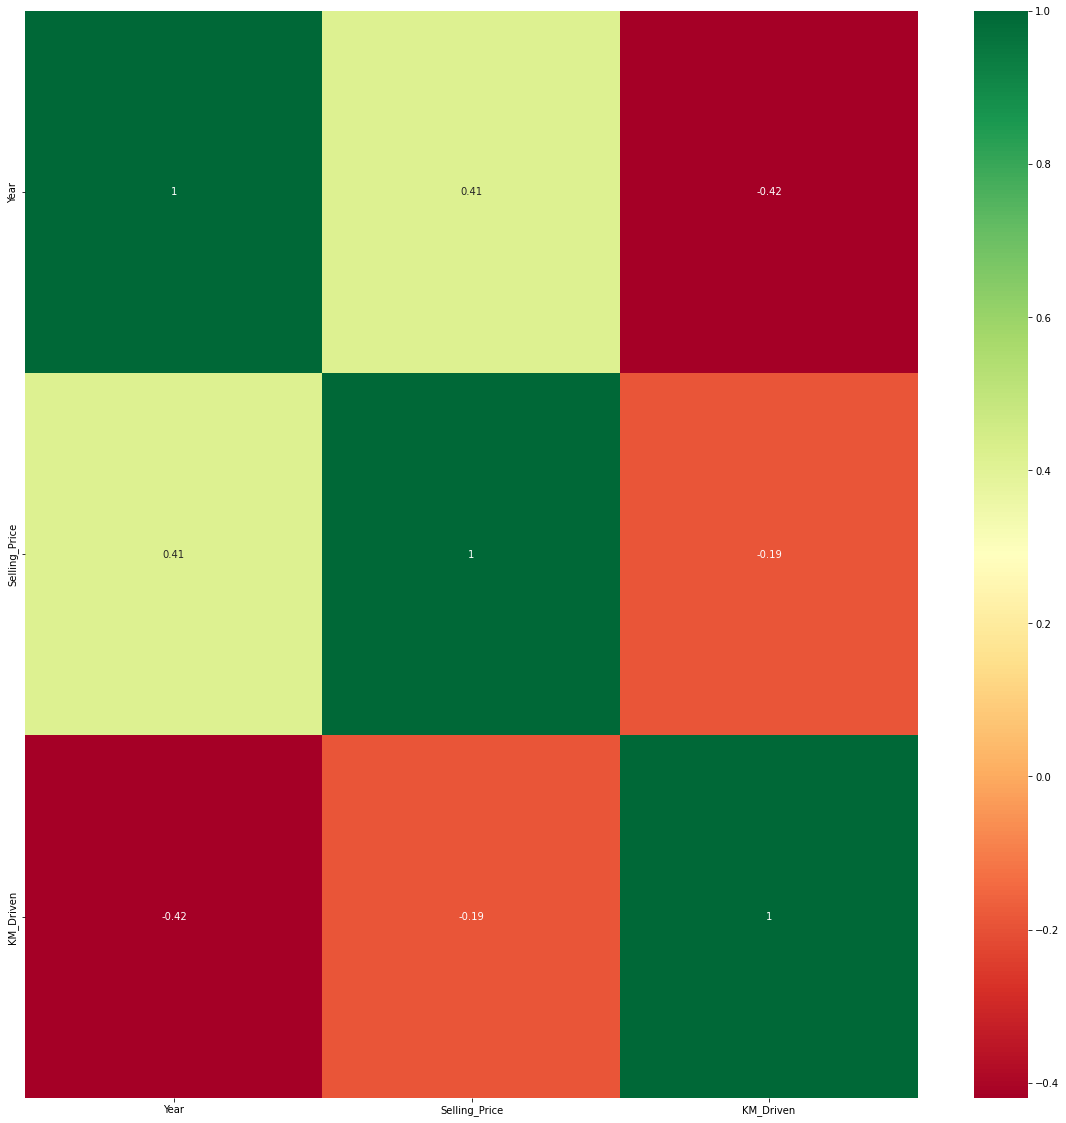

In [34]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = df.corr(method='pearson')
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map of the corerlation of the features
g=sns.heatmap(df[top_corr_features].corr(method='pearson'),annot=True,cmap="RdYlGn")

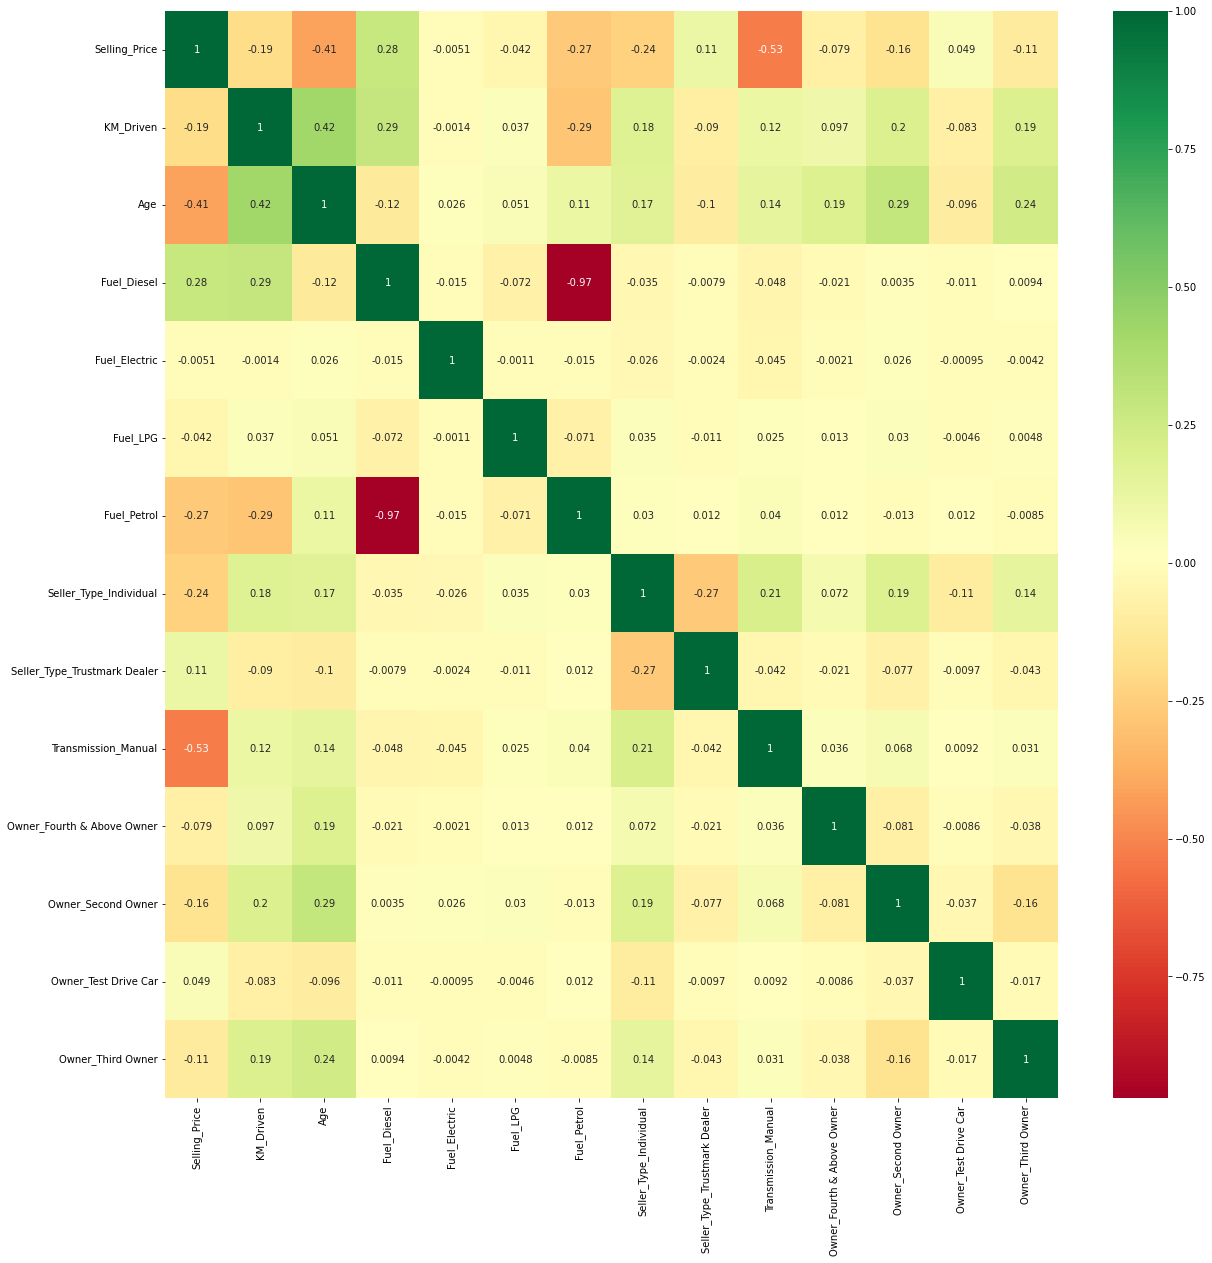

In [35]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = final_dataset.corr(method='pearson')
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map of the corerlation of the features
g=sns.heatmap(final_dataset[top_corr_features].corr(method='pearson'),annot=True,cmap="RdYlGn")

In [36]:
final_dataset


,Selling_Price,KM_Driven,Age,Fuel_Diesel,Fuel_Electric,Fuel_LPG,Fuel_Petrol,Seller_Type_Individual,Seller_Type_Trustmark Dealer,Transmission_Manual,Owner_Fourth & Above Owner,Owner_Second Owner,Owner_Test Drive Car,Owner_Third Owner
0,60000,70000,15,0,0,0,1,1,0,1,0,0,0,0
1,135000,50000,15,0,0,0,1,1,0,1,0,0,0,0
2,600000,100000,10,1,0,0,0,1,0,1,0,0,0,0
3,250000,46000,5,0,0,0,1,1,0,1,0,0,0,0
4,450000,141000,8,1,0,0,0,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4335,409999,80000,8,1,0,0,0,1,0,1,0,1,0,0
4336,409999,80000,8,1,0,0,0,1,0,1,0,1,0,0
4337,110000,83000,13,0,0,0,1,1,0,1,0,1,0,0
4338,865000,90000,6,1,0,0,0,1,0,1,0,0,0,0


In [37]:
final_dataset.iloc[:,0]


0        60000
1       135000
2       600000
3       250000
4       450000
         ...  
4335    409999
4336    409999
4337    110000
4338    865000
4339    225000
Name: Selling_Price, Length: 4340, dtype: int64

In [38]:
X= final_dataset.iloc[:,1:]
#slicing the dataset and reomoving the selling price for training the model
Y = final_dataset.iloc[:,0] 
#storing the selling price for checking..as this is the value to be predicted


In [39]:
final_dataset.head()


,Selling_Price,KM_Driven,Age,Fuel_Diesel,Fuel_Electric,Fuel_LPG,Fuel_Petrol,Seller_Type_Individual,Seller_Type_Trustmark Dealer,Transmission_Manual,Owner_Fourth & Above Owner,Owner_Second Owner,Owner_Test Drive Car,Owner_Third Owner
0,60000,70000,15,0,0,0,1,1,0,1,0,0,0,0
1,135000,50000,15,0,0,0,1,1,0,1,0,0,0,0
2,600000,100000,10,1,0,0,0,1,0,1,0,0,0,0
3,250000,46000,5,0,0,0,1,1,0,1,0,0,0,0
4,450000,141000,8,1,0,0,0,1,0,1,0,1,0,0


In [40]:
X.head()


,KM_Driven,Age,Fuel_Diesel,Fuel_Electric,Fuel_LPG,Fuel_Petrol,Seller_Type_Individual,Seller_Type_Trustmark Dealer,Transmission_Manual,Owner_Fourth & Above Owner,Owner_Second Owner,Owner_Test Drive Car,Owner_Third Owner
0,70000,15,0,0,0,1,1,0,1,0,0,0,0
1,50000,15,0,0,0,1,1,0,1,0,0,0,0
2,100000,10,1,0,0,0,1,0,1,0,0,0,0
3,46000,5,0,0,0,1,1,0,1,0,0,0,0
4,141000,8,1,0,0,0,1,0,1,0,1,0,0


In [41]:
Y.head()


0     60000
1    135000
2    600000
3    250000
4    450000
Name: Selling_Price, dtype: int64

In [42]:
from sklearn.ensemble import ExtraTreesRegressor
#in ensemble predictions of several base estimators are built in with a given learning algorithm.
#we used ExtraTreesRegressor
model = ExtraTreesRegressor()
#This class implements a meta estimator that fits a number of randomized decision trees 
#on various sub-samples of the dataset and uses averaging to improve the 
#predictive accuracy and control over-fitting.
model.fit(X,Y)

ExtraTreesRegressor()

In [43]:
print(model.feature_importances_)


[2.48634809e-01 2.44628714e-01 1.30278022e-01 3.64429369e-05
 2.57820635e-05 2.13928670e-04 4.71623440e-02 8.53223479e-03
 2.92831817e-01 8.33110594e-04 2.15810864e-02 9.07619637e-04
 4.33408992e-03]


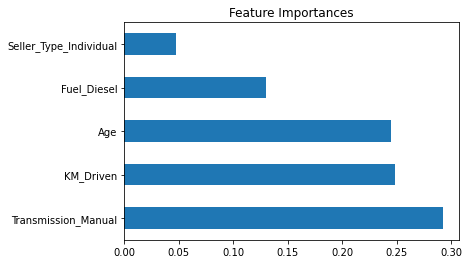

In [44]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.title('Feature Importances')
plt.show()

In [45]:
from sklearn.model_selection import train_test_split #class to divide the data into train and validation set

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [46]:
X_train.shape

from sklearn.ensemble import RandomForestRegressor
regressor=RandomForestRegressor()

In [47]:
import numpy as np
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]


In [49]:
 #Randomized Search CV
# Number of features to consider at every split
max_features = ['auto', 'sqrt'] # we first consider all the featurees and 
#then sqare root number of features to train the model

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
#we create trees with 5 10 15 for each model...and train it

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# we split as 2 nodes forst then 5 then 10 like that till 100 from the list

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [50]:
max_depth


[5, 10, 15, 20, 25, 30]

In [51]:
from sklearn.model_selection import RandomizedSearchCV


In [53]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
print(random_grid)


{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [54]:
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)


In [55]:
rf_random.fit(X_train,y_train)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.4s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   1.9s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   1.9s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [56]:
predictions=rf_random.predict(X_test)


In [57]:
predictions1=rf_random.predict(X_train)


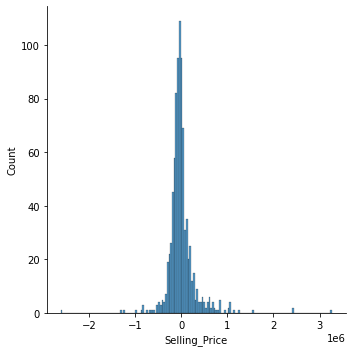

In [58]:
sns.displot(y_test-predictions)


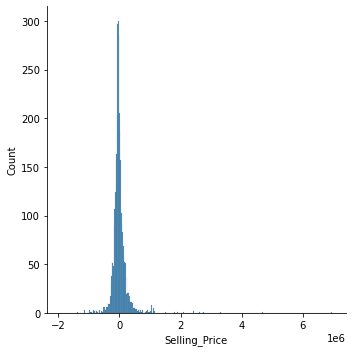

In [59]:
  sns.displot(y_train-predictions1)


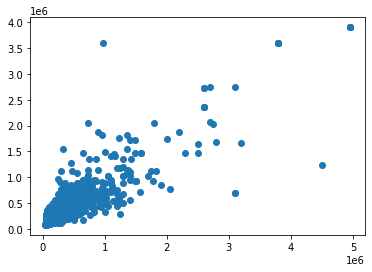

In [60]:
plt.scatter(y_test,predictions)


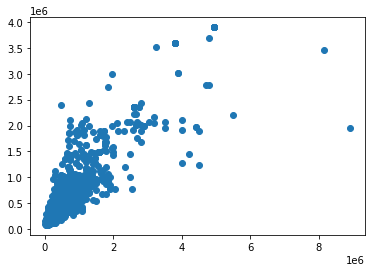

In [61]:
plt.scatter(y_train,predictions1)


In [62]:
import pickle
# open a file, where you ant to store the data
file = open('random_forest_regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(rf_random, file)
#we use a pickle file to store the data in a byte stream format

In [63]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test,predictions)
rmse = np.sqrt(mse)
print("RMSE : {:.2f}".format(rmse))

RMSE : 313684.05


In [64]:
from sklearn.metrics import r2_score
r = r2_score(y_test, predictions)
print("R2 score : {}" . format(r))

R2 score : 0.7350279679923384


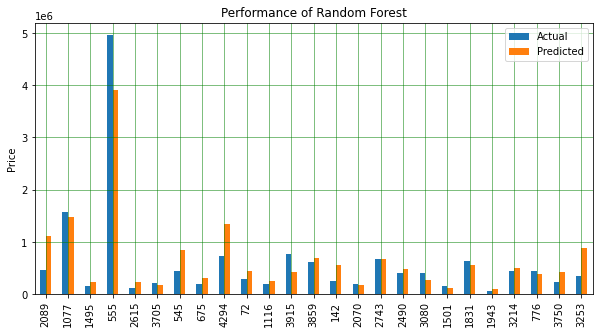

In [65]:
df_check = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
df_check = df_check.head(25)
#round(df_check,2)
df_check.plot(kind='bar',figsize=(10,5))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.title('Performance of Random Forest')
plt.ylabel('Price')
plt.show()

In [66]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
mse_predict = round(mean_squared_error(y_test,predictions),4)
mae_predict = round(mean_absolute_error(y_test,predictions),4)
print ('MSE is:'+str(mse_predict))
print ('MAE is:'+str(mae_predict))

MSE is:98397682776.5873
MAE is:172980.8826


In [67]:
import warnings
warnings.filterwarnings("ignore")

In [68]:
cutoff = 1.8                              # decide on a cutoff limit
y_pred_classes = np.zeros_like(predictions)
y_test_classes = np.zeros_like(predictions)     # initialise a matrix full with zeros
y_pred_classes[abs(y_test - predictions) > cutoff] = 1  

In [69]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_classes, y_pred_classes)

Text(0.5, 1.0, 'Confusion Matrix')

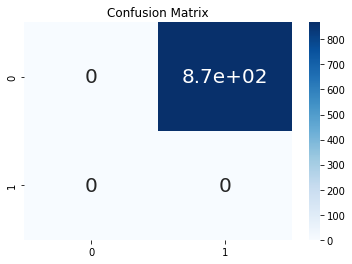

In [70]:
df_cm = cm
sns.heatmap(df_cm,annot=True,cmap="Blues" ,annot_kws={"size": 20})
plt.title('Confusion Matrix')

In [71]:
from sklearn.metrics import classification_report
matrix = classification_report(y_test_classes, y_pred_classes)
print(matrix)

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00     868.0
         1.0       0.00      0.00      0.00       0.0

    accuracy                           0.00     868.0
   macro avg       0.00      0.00      0.00     868.0
weighted avg       0.00      0.00      0.00     868.0



In [72]:
  from sklearn.metrics import accuracy_score
s = accuracy_score(y_test_classes,y_pred_classes)
print("accuracy of the model : {}" . format(s))


accuracy of the model : 0.0
